# Prueba Brain Food Jorge Hoffmann


## I. Contexto

El presente documento muestra el proceso de resolución para la prueba acerca de un modelo de demanda de una empresa agrícola. Actualmente, la empresa enfrenta problemas de sobrestock. La principal sospecha es que esto se debe a un problema en el método de proyección que se está utilizando. Esperan desarrollar un modelo más preciso, para lo que se dispone de 10 años de datos históricos para sus 1000 productos.

Este reporte constará de 4 secciones posteriores al contexto. Inicialmente, se definirá el plan de trabajo, aclarando el enfoque para abordar el desafío y definición del tiempo a dedicar por tarea. Luego, se estudian distintos enfoques de modelación considerando todo el flujo de Machine Learning, desde el análisis exploratorio hasta la validación de distintos modelos. Hecho esto, se propondrá una metodología para medir el beneficio de la solución. Por último, se describirá la metodología para poner en productivo la solución propuesta.

## II. Definición de plan de trabajo

Entendiendo que el problema es la poca precisión de las proyecciones actuales, el enfoque de resolución se basará en el uso de modelos de ML, generando modelos de predicción de demanda alternativos al modelo actual. Antes de generar cualquier modelo, deberán existir etapas previas que incluyen: análisis exploratorio de los datos, aseguramiento de la calidad, el procesamiento de datos, etc. Adicionalmente, en un contexto real, debiesen existir reuniones con los stakeholders de cara a entender más acerca de los datos: 
- ¿Existen estacionalidades en la industria o en ciertos productos? 
- Cuando ocurren sobre estimaciones, ¿los productos terminan caducando (se pierden) o tienen estrategias para mover el precio?
- ¿Existen productos (skus) que hayan sustituido a otros? -la data muestra muchos productos que desaparecen abruptamente-
- La información entregada, ¿corresponde a la demanda o a la venta? entendiendo que en ocasiones la venta es menor a la demanda productos de quiebres de inventario.  

De cara al desarrollo de esta prueba las preguntas anteriores se obviarán. Sin embargo, se reitera que en un contexto real es clave entender más del negocio de boca de quienes lo conocen, de modo de tener una perspectiva más completa de los datos.

Si se quisiera seguir un enfoque más apegado al modelamiento de las series de tiempo, se podría utilizar un modelo como ARIMA (AutoRegressive Integrated Moving Average) u otro en esa línea. Sin embargo, de cara a esta prueba se priorizará el uso de modelos más generalistas, útiles para una amplia gama de problemas supervisados de regresión.

A continuación, se presenta una planificación tentativa, la que considera una persona trabajando full time en el proyecto. Cabe destacar que esta es una planificación ideal, ya que asume que a medida que las tareas avanzan no existen demoras / atrasos por parte del cliente. Además, asume que los resultados son satisfactorios en cada etapa, continuando con la siguiente sin tener que volver a iterar. Por lo anterior, este plan de trabajo es algo más "interno". Si se quisiera presentar a cliente, habría que trabajarlo de modo de aclarar que estos hitos son secuenciales y demorar uno puede postergar el siguiente, pudiendo llegar a retrasar la entrega final del proyecto. 

![gantt](images/gantt.png)

**Hito 1: Pasos preliminares**  
- Recepción inicial de los datos: se reserva una semana para que el cliente entregue los datos acordados.
- Validaciones de calidad y entendimiento de los datos: con los datos en mano, se procederá a analizarlos, asegurando su calidad. Se validará que no existan datos perdidos, datos mal tabulados, etc. Además, se debe comprobar que lo que muestran los datos es la realdiad del negocio, de modo que se incluye una reunión de validación y dudas.
- Diagnóstico del modelo actual: paralelamente, se trabajará en validar el desempeño del modelo actual, entendiendo si realmente existe un sesgo en la predicción u otros problemas. Nuevamente, se debe incluir una reunión de validación.

**Hito 2: Diseño del modelo**  
- Análisis exploratorio de los datos: finalizados los pasos preliminares, se realizará un análisis exploratorio de los datos, buscando patrones entre ellos. Acá la dificultad será que existen bastantes productos, de modo que hay que priorizar los análisis en aquellos que más impacto se pueda generar.
- Feature Engineering: en esta etapa se generarán los atributos necesarios para entrenar los modelos. Lo anterior debe responder a los hallazgos del análisis exploratorio.
- Exploración de diversos métodos de modelación: se listarán y evaluarán distintos métodos de modelación. Cuando se habla de series de tiempo, existen dos opciones principalmente: se puede modelar cada serie de tiempo de forma independiente o generar una modelación global. El primer enfoque es más sencillo de implementar y usualmente funciona bien cuando las series tienen muchos datos y cada una es muy particular. En cambio, un enfoque de modelación global sería útil cuando las series de tiempo sean similares entre sí. Probablemente, se debería apuntar a un enfoque híbrido: generar clústers de series de tiempo que sean similares entre sí y esas agruparlas en un modelo. Luego, se genera un modelo por clúster y no un modelo por serie de tiempo. Algo que a priori se descarta por su alto costo son los enfoques de Deep Learning. Si bien estos pueden generar buenos resultados modelando series de tiempo de forma global, son un enfoque más complejo de implementar y computacionalmente más costoso.
- Definir enfoque definitivo de modelación: según lo revisado en la tarea anterior, se definirá el mejor enfoque posible para el problema.

**Hito 3: Piloto**  
- Definición de grupo de productos para realizar un piloto: de cara a minimizar el riesgo y mostrar los efectos del nuevo modelo, se debe definir un set de productos para realizar un piloto, además de otro set de datos que funcione como grupo control. 
- Implementación y recolección de resultados del piloto: en esta etapa se usa el modelo nuevo con los productos piloto, mientras que el modelo antiguo con los productos control. Se plantea un mes de cara a poder tener un ciclo de trabajo completo para obtener conclusiones.
- Entrega resultados piloto: se consolidan y comunican los resultados del piloto. Dependiendo de estos, es posible avanzar con otro piloto para continuar acotando el riesgo o, en su defecto, comenzar el paso a productivo.

**Hito 4: Productivo**  
- Implementación en productivo: se ejecutan las distintas tareas necesarias para que este sistema funcione en productivo.
- Marcha blanca: se reserva un periodo para poder atender cualquier incidencia proveniente del nuevo modelo con prioridad máxima.

El enfoque definido ejecutado a través de los pasos mencionados impacta positivamente al cliente, ya que le permite evaluar en un entorno controlado los resultados que genere el nuevo modelo. Además, se reconoce su experticia con los datos, buscando incluirla dentro de las decisiones de modelación. Más en concreto, este proyecto mejorará la precisión de las predicciones, lo que le permitirá al cliente una planificación más eficiente para enfrentar su demanda, y así obtener ventajas comparativas sobre su competencia.


## III. Construcción del Modelo y Validación: 

En esta sección se muestra el flujo dompleto de Machine Learning para proyectar la demanda, desde el trabajo inicial con los datos hasta los modelos planteados e incluso se muestra la proyección al 2024.

De cara a validar este modelo, se dejarán los datos del 2023 completo como set de validación, mientras que todos los datos previos son el set de entrenamiento. De esta forma, los modelos son construidos únicamente con datos hasta el 2023 y luego son evaluados según su desempeño prediciendo el 2023, datos no usados para el entrenamiento. Esto permite concluir qué modelo funcionará mejor a la hora de predecir el 2024. Cabe destacar que se utilizarán dos métricas de error principalmente: error absoluto medio y error absoluto mediano. Estas dos métricas permitirán comparar los modelos en cuanto a que tan cercanas son las predicciones a los valores reales. Se prefiere utilizar ambas ya que el valor absoluto mediano se caracteriza por no verse afectado por outliers en el error, mientras que el error absoluto medio sí. Así, si el error absoluto medio es muy alto, mientras que el error absoluto mediano es más bajo, se podrá concluir que hay casos de error muy grandes, pero que podrían representar outliers.

Para efectos de esta prueba, se usará toda la historia disponible para todos los productos que hayan vendido durante el 2023. Esto porque, al ser data mensual, cada año representa solo 12 datos por producto, lo que no es mucho. Si fuese data con una granularidad diaria, se buscaría acotar el tiempo de entrenamiento a entre 2 a 3 años.

Al final de esta sección se construye el archivo .csv disponible en esta carpeta.

Cabe destacar que el procedimiento mostrado en este Jupyter Notebook no es replicable directamente en productivo y de hecho no es su finalidad. Por ello, a continuación se describe cómo funcionaría este modelo en productivo.
- Recolección diaria de los datos: paso que el cliente ya está haciendo, pero que es el inicio del proceso. Consta de recolectar los datos de venta en una base de datos transaccional.
- Consolidación de datos mensual: de momento, el cliente entregó esta data. En un entorno productivo, habría que validar si es el cliente el que se hace cargo de esta etapa o no. Si es el cliente, se perdería visibilidad en cuanto al tratamiento de datos anómalos, si es que existe alguna estacionalidad dentro del mes, etc. Sin embargo, si el cliente no se hiciera cargo de la tarea, el proceso final quedaría más complejo.
- Entrega o disponibilizacion de los datos: el cliente hace entrega periódica de los datos. Esto podría realizarse a través de S3 o dar acceso directamente a su servidor.
- Re-entrenamiento del modelo (según monitoreo): una vez que el monitoreo indique que el modelo lo necesita, se debe volver a entrenar. En la práctica, el modelo es guardado como un archivo joblib. Un trabajo de entrenamiento puede ser full o light. En el primer caso, se incluye un proceso de Hyperparameter Tuning. En cambio, un entrenamiento light toma los hiperparámetros como inputs.
- Generación de nuevas predicciones: se generan predicciones para 12 meses al futuro.
- Entrega de las nuevas predicciones: se entregan a cliente las predicciones. Puede ser S3, interfaz gráfica, etc.

A continuación, se muestra muy a grandes rasgos cómo se debiese modelar este problema.

### 1. Importando los datos y librerías necesarias

De cara a este trabajo, el primer punto es importar las librerías necesarias y los datos desde el .csv entregado. Para efectos de esta prueba, se priorizará el uso de librerías de dataframes y gráficos más estándar, como lo son pandas y matplotlib y se descartarán alternativas como polars y plotly.

In [3]:
# Importaciones necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import median_absolute_error, mean_absolute_error
from libs.utilities import *
from sklearn.linear_model import LinearRegression, ElasticNet
from lightgbm import LGBMRegressor

plt.style.use('seaborn-v0_8-dark')

palette = sns.color_palette()

In [4]:
# Se lee el .csv como dataframe y se ordena por fecha y por product id
df = pd.read_csv('desafio_modelo_de_demanda.csv')
df['fecha'] = pd.to_datetime(df['fecha'])
df = df.sort_values(by=['fecha', 'prod_id']).copy().reset_index(drop=True)
df.head()

,fecha,prod_id,precio_promedio,ventas,modelo_actual
0,2012-01-01,2,8585.299512,1387.0,1331.628254
1,2012-01-01,13,7877.697279,1528.0,1404.605626
2,2012-01-01,29,4702.427988,2048.0,1866.040314
3,2012-01-01,49,864.304788,1882.0,1866.272042
4,2012-01-01,63,2366.580285,2973.0,3251.169285


### 2. Análisis exploratorio

#### 2.1. Revisiones generales

In [5]:
df.describe()

,fecha,prod_id,precio_promedio,ventas,modelo_actual
count,80748,80748.000000,80748.000000,80748.000000,80748.000000
mean,2019-01-22 09:28:48.577797632,498.788379,5386.770862,1089.565958,1093.682259
min,2012-01-01 00:00:00,0.000000,606.335817,0.000000,0.000000
25%,2016-12-01 00:00:00,248.000000,3018.438689,547.000000,713.346179
50%,2019-04-01 00:00:00,494.000000,5079.052675,954.000000,1064.464617
75%,2021-06-01 00:00:00,751.000000,7336.782635,1468.000000,1421.259490
max,2023-12-01 00:00:00,999.000000,13978.011657,6404.000000,5397.308408
std,NaN,290.397741,2893.919808,716.509618,507.905494


**Comentarios:**  
Al aplicar el método describe sobre el dataframe se ve un resumen de los datos con los que se trabaja. Son 80747 datos que no tienen faltantes. Además, se observa que las distribuciones de los datos hacen sentido respecto a sus órdenes de magnitud. Otro punto positivo es que no existen ventas ni precios negativos, así como predicciones negativas.

In [6]:
df.isna().any()

fecha              False
prod_id            False
precio_promedio    False
ventas             False
modelo_actual      False
dtype: bool

**Comentarios:**  
Se corrobora que no existen valores nulos en ninguna de las filas para ninguna de las columnas.

#### 2.2. Revisión densidad de fechas por producto
En esta sección se comprobará que cada serie de tiempo (cada producto) tenga una densidad completa en cuanto a sus meses. Es decir, que todo producto tenga datos para todos los meses desde su primer mes de venta hasta su último mes de venta.

In [7]:
# Se calcula el largo de las series de tiempo para cada producto como la diferencia en meses desde la mínima venta a la máxima venta.

df_fechas = df[['prod_id', 'fecha']].groupby('prod_id').agg(['min', 'max']).reset_index().droplevel(0, axis=1)
df_fechas.columns = ['prod_id', 'min', 'max']
df_fechas['meses'] = (df_fechas['max'].dt.year - df_fechas['min'].dt.year) * 12 + (df_fechas['max'].dt.month - df_fechas['min'].dt.month)+ 1
df_fechas.sort_values(by='max')

,prod_id,min,max,meses
446,446,2012-01-01,2012-12-01,12
575,575,2012-01-01,2012-12-01,12
868,868,2012-01-01,2012-12-01,12
652,652,2012-01-01,2012-12-01,12
257,257,2012-01-01,2012-12-01,12
...,...,...,...,...
405,405,2014-01-01,2023-12-01,120
407,407,2012-01-01,2023-12-01,144
408,408,2017-01-01,2023-12-01,84
389,389,2015-01-01,2023-12-01,108


In [8]:
# Se calcula la cantidad real de registros (meses) que tiene cada producto
df_temp = df[['prod_id', 'fecha']].groupby('prod_id').count().reset_index(drop=True)
(df_temp['fecha'] == df_fechas['meses']).all()

True

**Comentarios**  
Con lo anterior se comprueba que todos los productos tienen datos para todos los meses desde su mes inicial de venta hasta su mes final. Es decir, las series de tiempo no tienen hoyos o periodos en que desaparecen para luego volver.

#### 2.3. Revisión productos pronosticables

Dentro de los datos se observa que existen productos que dejan de tener ventas en años anteriores. Por ejemplo, que no venden durante el 2023. Estos casos serán aislados y excluidos de los análisis y los modelos. Esto es un supuesto correcto, ya que son productos que no presentan demanda y tampoco presentan un pronóstico para esas fechas, de modo que posiblemente salieron del mix. 

En este punto haría sentido conversar con el cliente qué ocurre con estos productos. ¿Salieron de mix? ¿Existe falta de stock? ¿Hubo un cambio de código? ¿Fueron reemplazados por otros productos?

In [9]:
# Se buscan todos los productos cuya máxima fecha de venta sea menor a diciembre de 2023. Es decir, que no hayan vendido durante el último mes registrado. 
df_productos_sin_venta = df_fechas[df_fechas['max'] < pd.to_datetime('2023-12-01')].sort_values(by='max')
df_productos_sin_venta

,prod_id,min,max,meses
652,652,2012-01-01,2012-12-01,12
446,446,2012-01-01,2012-12-01,12
959,959,2012-01-01,2012-12-01,12
257,257,2012-01-01,2012-12-01,12
868,868,2012-01-01,2012-12-01,12
...,...,...,...,...
263,263,2017-01-01,2022-12-01,72
406,406,2017-01-01,2022-12-01,72
748,748,2013-01-01,2022-12-01,120
703,703,2012-01-01,2022-12-01,132


**Comentarios:**  
Se observa que los 365 productos a excluir dejaron de tener venta el 2022. Es decir, son productos que llevan al menos 1 año completo sin venta ni pronóstico. Nuevamente, se reitera que el supuesto de excluirlos es aceptable.

In [10]:
productos_sin_venta = df_productos_sin_venta['prod_id'].unique()

In [11]:
# Se redefine el dataframe solo con productos que tengan venta.
df = df[~df['prod_id'].isin(productos_sin_venta)].copy().reset_index(drop=True)

**Comentarios**  

A modo de resumen, estos 365 productos serán excluidos ya que no poseen data de venta en los últimos 12 meses. Cabe destacar que si tuviesen algún pronóstico, posiblemente son productos que estarían generando sobrestock, ya que se abastecen, pero no son demandados. Aparentemente, este no es el caso.

#### 2.4. Gráfico de venta y pronóstico para los 635 productos restantes.
De cara al análisis para el resto de los productos, se realizará una priorización por su ingreso (P * Q). Es decir, se revisarán con más atención productos con más ingreso mensual promedio. 

Este enfoque de priorización podría eventualmente extenderse a una segmentación con dos dimensiones, variabilidad y nivel de venta:
- Variabilidad: dispersión de los datos para un producto en un periodo de tiempo (ej: un año).
- Nivel de venta: suma total de la venta durante un periodo de tiempo (ej: un año).

Al tener estas dos dimensiones, a futuro se podría una segmentación matricial, en que los productos con alto nivel de venta y baja variabilidad deberían ser los productos estrella. Además, sob productos en que la sobreestimación no es tan grave, ya que podrían seguir vendiéndose en meses futuros siempre y cuando la caducidad lo permita. En cambio, si se sobreestiman productos de baja venta sí puede tener consecuencias fuertes en el stock, ya que son productos que difícilmente se venderán.

In [12]:
# Se genera un orden para analizar los productos
df['ingreso'] = df['precio_promedio'] * df['ventas']
lista_productos = list(df[['prod_id', 'ingreso']].groupby('prod_id').mean().reset_index().sort_values(by='ingreso', ascending=False)['prod_id'])


In [13]:
# Se generan 635 gráficos de la venta vs modelo actual priorizando los productos de mayor ingreso. 
# Estos gráficos son guardados en la carpeta plots/evolutivos_inicial

for i, prod_id in enumerate(lista_productos):
    break # No se generan gráficos para evitar sobre cargar el notebook

    df_temp = df[df['prod_id']==prod_id].copy()
    plt.figure(figsize=(16, 4))
    plt.title(f'Grafico producto: {prod_id}')
    sns.lineplot(data=df_temp, x='fecha', y='ventas', label='Venta')
    sns.lineplot(data=df_temp, x='fecha', y='modelo_actual', label='Modelo_actual')
    plt.savefig(f'plots/evolutivos_inicial/{i:03d}_{prod_id}.png')

**Comentarios:**  
La celda anterior genera gráficos que son guardados dentro de plots/evolutivos_inicial. Por temas de orden y eficiencia, se añade la instrucción break al inicio del loop, de modo que los gráficos no se generen cada vez que el notebook corra. Como se mencionó, los gráficos están ordenados según su ingreso promedio mensual. Cada gráfico está guardado con un string 'nnn_ppp.png' donde nnn representa el número dentro del ranking de productos, mientras que ppp el código del producto.

A continuación, se muestra el top 3 de gráficos evolutivos por ingreso y se comenta acerca de ellos. Si bien se revisaron todos los gráficos, las conclusiones adicionales no distan mucho de lo comentado aquí.

![evolutivo](plots/evolutivos_inicial/000_574.png)
![evolutivo](plots/evolutivos_inicial/001_501.png)
![evolutivo](plots/evolutivos_inicial/002_142.png)

En general, se observa un pronóstico con un cumplimiento correcto en cuanto al orden de magnitud general de pronóstico para todos los productos. Sin embargo, tiene un problema grave en los peaks de venta.
- Se observa que el pronóstico es mucho más suave que la curva de venta, que tiende a ser bastante cambiante. Esto implica que en periodos de mucha venta, el pronóstico está quedando corto, mientras que en periodos de poca venta, el pronóstico queda alto. Casi pareciera que el pronóstico está apuntando de manera demasiado conservadora a la media de la venta y no a sus estacionalidades particulares. Lo anterior perfectamente puede generar sobrestock, ya que los meses de poca venta se están sobre abasteciendo y luego no existe demanda para ese stock. Además, esto muestra un problema hasta ahora no comentado que incluso puede llegar a ser más grave: la subestimación. Todo mes en que la venta es mucho más alta que el pronóstico, puede terminar provocando quiebres, que además de llevar a ventas perdidas, puede castigar permanentemente la relación de largo plazo con los clientes finales, deterioriando la posición de mercado.
- Se observa también cierto desfase en los peaks más importantes de algunos productos. Tomando como ejemplo el SKU 142 (tercer gráfico) se observa que tiene un peak muy importante a inicios del 2018. El pronóstico definitivamente queda muy corto, sin embargo, el siguiente mes el pronóstico intenta subir para corregir, sin embargo, la demanda ya ha bajado y termina quedando largo. Nuevamente, el mes de peak queda muy corto, provocando quiebres y venta perdida, pero el mes posterior queda muy pasado, provocando sobrestock. Esto podría pasar por un modelo que no tiene bien revisadas las estacionalidades de los productos.


In [14]:
reportar_error(df.ventas, df.modelo_actual)

Error absoluto medio: 402.32
Error absoluto mediano: 279.18


**Comentarios**:  
Se calcula el error absoluto medio y error absoluto mediano para el modelo actual. Se puede concluir que los errores tienen una distribución alargada hacia la derecha, ya que la mediana del error son solo 279 unidades, mientras que la media son 402. Esto quiere decir que existen errores altos que suben la media de forma importante.

(-10.0, 3500.0)

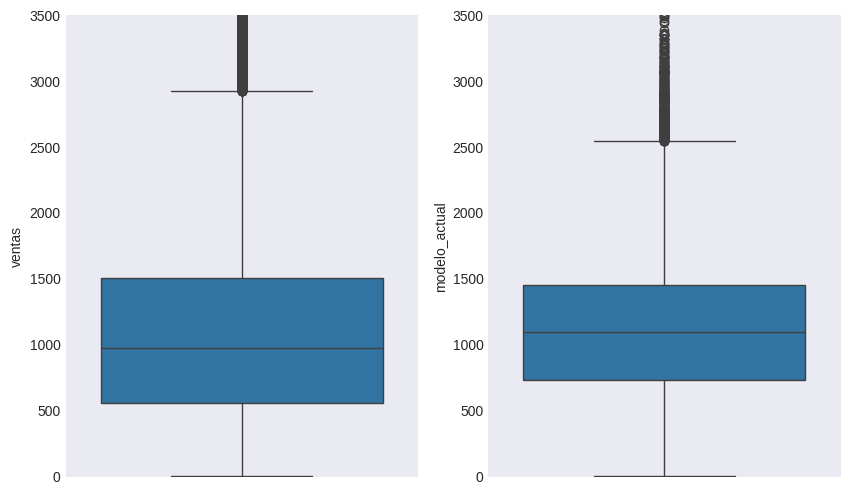

In [15]:
# Buscamos ver que pasa con la relación entre el modelo y la venta

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='ventas' )
plt.ylim([-10, 3500]) 
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='modelo_actual')
plt.ylim([-10, 3500]) 


**Comentarios:**  
El gráfico anterior muestra un boxplot de las ventas a la izquierda y las predicciones del modelo a la derecha. En lo general, se mueven en valores bastantes similares. Sin embargo, se ve que la distribución de los pronósticos actuales es más acotada. De hecho, tanto la caja como el bigote superior tienen un rango menor. 

Text(0.5, 1.0, 'Gráfico de dispersión entre las ventas y las predicciones')

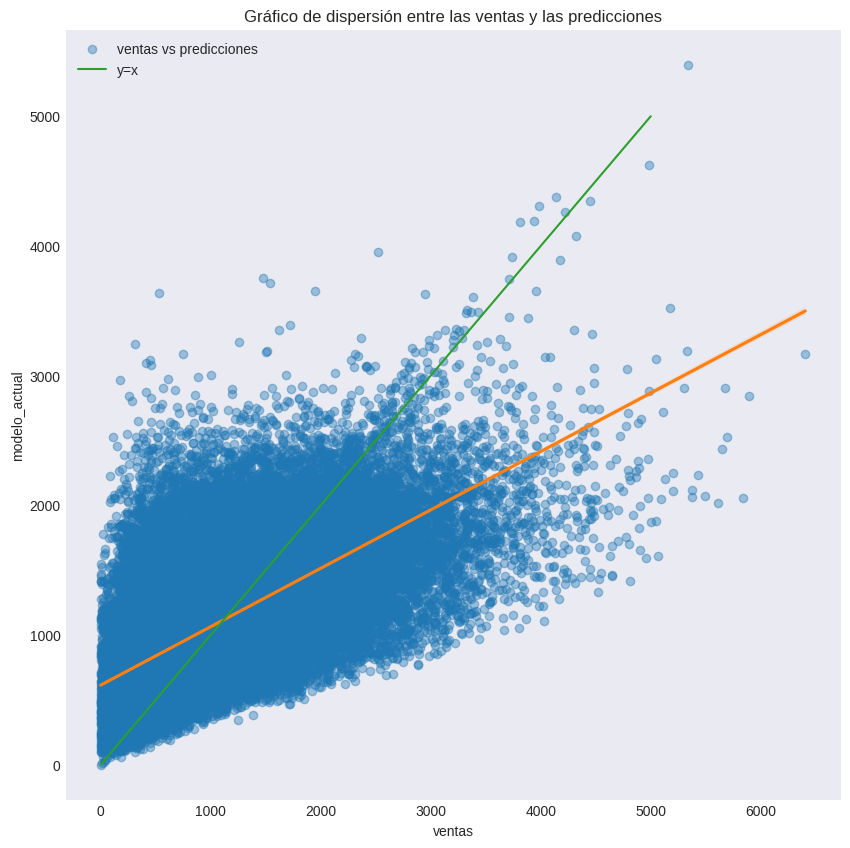

In [16]:
plt.figure(figsize=(10, 10))

sns.regplot(data=df, x='ventas', y='modelo_actual', label='ventas vs predicciones', scatter_kws={'color':palette[0], 'alpha':0.4}, line_kws={'color':palette[1]})
sns.lineplot(x=range(0, 5000), y=range(0, 5000), c=palette[2], label='y=x')
plt.title('Gráfico de dispersión entre las ventas y las predicciones')


**Comentarios**:  
El gráfico anterior muestra la dispersión entre las ventas y las predicciones para todos los productos. En un escenario perfecto, se debería ver que todos los puntos están en la curva $y=x$. Sin embargo, se observa que la nube de puntos es más dispersa que eso. También, llama la atención de que la densidad de puntos es mucho mayor en la zona que $modelo actual>ventas$ respecto a $ventas>modelo actual$. Esto pareciera indicar que hay más densidad de sobre estimaciones y que también son de una magnitud más importante. Esto concuerda totalmente con lo comentado del sobrestock.

#### 2.5. Gráfico para analizar estacionalidad
De modo de analizar si es que existen estacionalidades para los distintos productos, se realiza la siguiente revisión. En ella, se generarán distintos gráficos que resumirán el comportamiento anual de cada producto en un mismo gráfico. Nuevamente, el código está con una instrucción break para evitar que corra.

In [17]:
# Dataframe alternativo
df_plot = df[['prod_id', 'fecha','ventas', 'precio_promedio']].copy()
df_plot['year'] = df_plot['fecha'].dt.year
df_plot['month'] = df_plot['fecha'].dt.month

df_plot.head()

,prod_id,fecha,ventas,precio_promedio,year,month
0,13,2012-01-01,1528.0,7877.697279,2012,1
1,29,2012-01-01,2048.0,4702.427988,2012,1
2,89,2012-01-01,2214.0,4550.364204,2012,1
3,101,2012-01-01,1600.0,2993.408360,2012,1
4,106,2012-01-01,1541.0,6487.002360,2012,1


In [18]:
for i, sku in enumerate(lista_productos):
   break
   plt.figure(figsize=(16, 4))
   df_temp = df_plot.loc[df_plot['prod_id'] == sku, ['fecha', 'ventas','month', 'year']]
   sns.lineplot(data=df_temp, x='month', y='ventas', alpha=0.2, errorbar=('sd'))
   plt.title(f'Venta producto: {sku}')
   plt.savefig(f'plots/estacionalidad/{i:03d}_{sku}.png')
   break



**Comentarios:**  
Nuevamente, se muestra un top de los gráficos. Si bien se revisaron todos, las conclusiones no distan de lo mostrado aquí.

![evolutivo](plots/estacionalidad/000_574.png)
![evolutivo](plots/estacionalidad/001_501.png)
![evolutivo](plots/estacionalidad/002_142.png)

Se ve que existe una estacionalidad para los distintos productos, pero que varía entre estos. Es decir, no todos los productos tienen el mismo grado de estacionalidad ni las mismas temporadas. Sin embargo, sí se ve que el mes de observación incide en la venta.

A continuación, se muestra otro gráfico en que esto es mucho más evidente. En el producto 672, existe una estacionalidad muy fuerte para el mes de enero, mientras que el resto del año es más estable.

![evolutivo](plots/estacionalidad/022_672.png)

#### 2.6. Gráfico para analizar relación con precio

De modo de analizar si el precio puede ser utilizado como regresor, se revisará la relación histórica entre el precio y la demanda para todos los productos. Nuevamente, los gráficos no se generarán por la instrucción break.

In [19]:
for i, sku in enumerate(lista_productos):
   break
   plt.figure(figsize=(8, 8))
   df_temp = df_plot.loc[df_plot['prod_id'] == sku, ['precio_promedio', 'ventas']]
   sns.regplot(data=df_temp, x='precio_promedio', y='ventas')
   plt.title(f'Relación entre precio y venta: {sku}')
   plt.savefig(f'plots/precio_ventas/{i:03d}_{sku}.png')


**Comentarios:**  
Para todos los productos, se observa un comportamiento como el del siguiente gráfico. Existe una relación inversa entre el precio y la demanda, como es esperado en productos de este tipo (se asume que no se está trabajando con productos de lujo). Por eso, el precio será utilizado como regresor. Un gran supuesto que se realizará es que el precio es una variable de decisión. Así, cuando se quieran realizar predicciones hacia el futuro, se podrán realizar con distintos precios. Además, como es difícil proyectar el precio a 1 año hacia el futuro, se entiende que esas proyecciones de demanda tendrán una incertidumbre mayor.

![evolutivo](plots/precio_ventas/000_574.png)



### 3. Feature Enginering

En esta sección se generan los features o atributos de acuerdo a lo revisado en el análisis exploratorio.

#### 3.1. Generar dummies para los meses
Para cada mes, se genera un atributo que indica el mes en cuestión. Esto se usará para modelar las estacionalidades.

In [20]:
X = df[['fecha', 'prod_id', 'precio_promedio', 'ventas']].copy()
y = X.pop('ventas')

In [21]:
X['mes'] = X['fecha'].dt.strftime("%b")
X.head()

,fecha,prod_id,precio_promedio,mes
0,2012-01-01,13,7877.697279,Jan
1,2012-01-01,29,4702.427988,Jan
2,2012-01-01,89,4550.364204,Jan
3,2012-01-01,101,2993.408360,Jan
4,2012-01-01,106,6487.002360,Jan


#### 3.2. Generar variable "Tendencia"
La variable tendencia ayuda a modelar el movimiento de largo plazo de los datos. Para el menor mes tomará el valor 1. Para el siguiente tomará el valor 2 y así sucesivamente.

In [22]:
min_fecha = X['fecha'].min()
X['tendencia'] =  (X['fecha'].dt.year - min_fecha.year) * 12 + (X['fecha'].dt.month - min_fecha.month) + 1
X

,fecha,prod_id,precio_promedio,mes,tendencia
0,2012-01-01,13,7877.697279,Jan,1
1,2012-01-01,29,4702.427988,Jan,1
2,2012-01-01,89,4550.364204,Jan,1
3,2012-01-01,101,2993.408360,Jan,1
4,2012-01-01,106,6487.002360,Jan,1
...,...,...,...,...,...
61027,2023-12-01,987,10389.074664,Dec,144
61028,2023-12-01,993,5831.254788,Dec,144
61029,2023-12-01,996,6174.524431,Dec,144
61030,2023-12-01,997,6801.272144,Dec,144


#### 3.3. Generar variable dias por mes
En este caso, como se está modelando a nivel mensual, es de esperar que los meses con mayor cantidad de días tengan una demanda mayor que los meses con una menor cantidad de días. Por esto, se genera la variable cantidad de días por mes.

In [23]:
X['days_in_month'] = ((X['fecha'] + pd.DateOffset(months=1)) - X['fecha']).dt.days
X

,fecha,prod_id,precio_promedio,mes,tendencia,days_in_month
0,2012-01-01,13,7877.697279,Jan,1,31
1,2012-01-01,29,4702.427988,Jan,1,31
2,2012-01-01,89,4550.364204,Jan,1,31
3,2012-01-01,101,2993.408360,Jan,1,31
4,2012-01-01,106,6487.002360,Jan,1,31
...,...,...,...,...,...,...
61027,2023-12-01,987,10389.074664,Dec,144,31
61028,2023-12-01,993,5831.254788,Dec,144,31
61029,2023-12-01,996,6174.524431,Dec,144,31
61030,2023-12-01,997,6801.272144,Dec,144,31


#### 3.4. Particionar datos
Como se comentó, los datos son divididos entre datos de entrenamiento y datos de prueba. Todo dato anterior a 2023 será usado para entrenar los diversos modelos, mientras que los posteriores serán para poner a prueba los modelos.

In [24]:
# Separación de datos para efectos generales
X_train = X.loc[X['fecha'] < pd.to_datetime('2023-01-01'), ['prod_id', 'precio_promedio', 'mes', 'tendencia', 'days_in_month']].copy()
y_train = y[X_train.index]

X_test = X.loc[X['fecha'] >= pd.to_datetime('2023-01-01'), ['prod_id', 'precio_promedio', 'mes', 'tendencia', 'days_in_month']].copy()
y_test = y[X_test.index]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53412, 5), (53412,), (7620, 5), (7620,))

### 4. Modelación
En esta sección se exploran múltiples enfoques de modelación para enfrentar este problema. Esto se hace con ayuda de distintas funciones y clases escritas en utilities.py. Estas son de mi autoría y las uso/adapto en los distintos proyectos que trabajo. A mi parecer, lo más interesante de esto es la clase Model que permite generar modelos para un set de datos específicos, incluyendo de ser necesario el proceso de optimización de hiperparámetros con Optuna. Adicionalmente, esta clase incluye la posibilidad de particionar los datos por alguna columna del set, generando modelos individuales e independientes para cada valor posible. Por último, este objeto de tipo Model puede ser guardado utilizando joblib. 

Observación: las funciones de utilities.py tienden a estar escritas en inglés ya que me es más natural y sencillo trabajar en ese idiomam, ya que así puedo trabajar el código con IA o encontrar ayuda en foros.

In [25]:

# Variable auxiliar que permite modificar el modo del Notebook. Se deja en False ya que los estudios de Optuna ya han sido realizados y no se desea retomarlos por un tema de eficiencia.
make_study = False

#### 4.1. Caso base

Se calcula el error para el caso base en el periodo de 2023, tanto en su versión media como mediana. Este es el modelo a vencer.

In [26]:
df_aux = df[df.index.isin(X_test.index)].copy()
reportar_error(y_test, df_aux['modelo_actual'])

Error absoluto medio: 441.97
Error absoluto mediano: 307.00


#### 4.2. Modelación global con LR
El primer enfoque consta de un solo modelo de regresión lineal que aplica a todo el set de datos en su conjunto. Por esto, la variable de producto debe ser cargada como variable categórica. 

In [27]:
base_estimator = LinearRegression()
vars = {'continuous': ['precio_promedio', 'tendencia', 'days_in_month'],
        'categorical_high_cardinality': [],
        'categorical_low_cardinality': ['mes', 'prod_id']
                                        }
parametros_estudio = {}

partition_by = None

model_1, estimator_name = load_or_create_model(base_estimator=base_estimator,
                                               vars=vars,
                                               partition_by=partition_by,
                                               study_parameters={},
                                               early_stopping_rounds=5)

In [28]:
# Se entrena el modelo generado, se guarda en la carpeta respectiva y se genera una predicción para el set de prueba,
model_1.train(X_train, y_train)
model_1.save(estimator_name)
y_hat = model_1.predict(X_test)

reportar_error(y_test, y_hat)

Error absoluto medio: 387.73
Error absoluto mediano: 289.29


**Comentarios:**:  
Se observa que incluso este modelo mejora el caso base levemente. Esto muestra las importantes oportunidades de mejora que existen.

#### 4.3. Modelación por producto con LR
Este enfoque es muy similar al anterior, pero la gran diferencia es que se genera una regresión lineal específica para cada producto. Lo anterior permite que el(los) modelos resultantes aprendan mejor de su set de datos.

In [29]:
base_estimator = LinearRegression()
vars = {'continuous': ['precio_promedio', 'tendencia', 'days_in_month'],
        'categorical_high_cardinality': [],
        'categorical_low_cardinality': ['mes']
                                        }
parametros_estudio = {}

partition_by = 'prod_id'

model_1, estimator_name = load_or_create_model(base_estimator=base_estimator,
                                               vars=vars,
                                               partition_by=partition_by,
                                               study_parameters={},
                                               early_stopping_rounds=5)

In [30]:
model_1.train(X_train, y_train)
model_1.save(estimator_name)
y_hat = model_1.predict(X_test)

reportar_error(y_test, y_hat)

Error absoluto medio: 343.74
Error absoluto mediano: 239.15


**Comentarios:**  
Como es de esperar, este enfoque tiene un mejor resultado cuando se evalúa para el 2023. El error absoluto mediobaja de 441 unidades a solo 343. Mientras que el error absoluto mediano baja de 307 a 239. Este es el mejor enfoque de los explorados.

#### 4.4. Elastic Net general  
Enfoque alternativo utilizando ElasticNet en vez de la regresión lineal. En este caso, se aplica el modelo a todos los datos, sin particionar. Este modelo es una regresión lineal, pero que incluye la norma L1 y L2 a la hora de optimizar. Lo anterior lo hace con la finalidad de regularizar y evitar el overfitting.

In [31]:
base_estimator = ElasticNet()
vars = {'continuous': ['precio_promedio', 'tendencia', 'days_in_month'],
        'categorical_high_cardinality': [],
        'categorical_low_cardinality': ['mes', 'prod_id']
                                        }
elasticnet_params = {
    'Estimator__alpha': ('float', 0, 1.0),       
    'Estimator__l1_ratio': ('float', 0.0, 1.0),         
    'Estimator__max_iter': ('int', 5000, 20000),        
}
partition_by = None

model_1, estimator_name = load_or_create_model(base_estimator=base_estimator,
                                               vars=vars,
                                               partition_by=partition_by,
                                               study_parameters=elasticnet_params,
                                               early_stopping_rounds=5)

In [32]:
if make_study:
    model_1.study(X_train, y_train, iter=100)

In [33]:
model_1.train(X_train, y_train)
model_1.save(estimator_name)
y_hat = model_1.predict(X_test)


reportar_error(y_test, y_hat)

Error absoluto medio: 388.81
Error absoluto mediano: 291.97


**Comentarios:**  
Se obtiene un error levemente mejor al caso base, sin embargo, no es mejor que en la regresión lineal. Dado que el modelo de regresión lineal es más sencillo y ni siquiera necesita optimizar hiperparámetros, es claro que se debe escoger ese modelo.

#### 4.5. Elastic Net específico
Modelo equivalente al anterior, solo que esta vez se aplica individuaolmente a cada producto.


In [34]:
base_estimator = ElasticNet()
vars = {'continuous': ['precio_promedio', 'tendencia', 'days_in_month'],
        'categorical_high_cardinality': [],
        'categorical_low_cardinality': ['mes']
                                        }
elasticnet_params = {
    'Estimator__alpha': ('float', 0, 1.0),            # Regularization parameter
    'Estimator__l1_ratio': ('float', 0.0, 1.0),          # Mixing parameter for L1 and L2 regularization
    'Estimator__max_iter': ('int', 5000, 20000),         # Maximum number of iterations for optimization
}
partition_by = 'prod_id'

model_1, estimator_name = load_or_create_model(base_estimator=base_estimator,
                                               vars=vars,
                                               partition_by=partition_by,
                                               study_parameters=elasticnet_params,
                                               early_stopping_rounds=5)

In [35]:
if make_study:
    model_1.study(X_train, y_train, iter=20)

In [36]:
model_1.train(X_train, y_train)
model_1.save(estimator_name)
y_hat = model_1.predict(X_test)


reportar_error(y_test, y_hat)

Error absoluto medio: 354.71
Error absoluto mediano: 241.92


**Comentarios:**  
El resultado es prácticamente el mismo que en la regresión lineal por producto. Esto hace mucho sentido, ya que son modelos muy parecidos. Sin embargo, dado que Elastic Net es más complejo de entrenar y mantener, se prioriza la regresión lineal. Solo en caso de que la regresión lineal presentara problemas de overfitting podría valer la pena explorar el enfoque de Elastic Net.

#### 4.6. Modelación global con Lightgbm
Similar a los casos anteriores, se propone un modelo de Gradient Boosting como LightGBM para modelar el problema de manera global.

In [37]:
base_estimator = LGBMRegressor(verbose=-1, force_col_wise=True)
vars = {'continuous': ['precio_promedio', 'tendencia', 'days_in_month'],
        'categorical_high_cardinality': [],
        'categorical_low_cardinality': ['mes', 'prod_id']}
             
lightgbm_params = {
    'Estimator__learning_rate': ('float', 0.01, 0.2),        # Learning rate for boosting
    'Estimator__num_leaves': ('int', 20, 100),               # Maximum tree leaves for base learners
    'Estimator__max_depth': ('int', 3, 7),                   # Maximum depth of tree base learners
    'Estimator__n_estimators': ('int', 50, 500),             # Number of boosting iterations
    'Estimator__subsample': ('float', 0.8, 1.0),             # Subsample ratio for training
    'Estimator__colsample_bytree': ('float', 0.8, 1.0),      # Subsample ratio of columns when constructing each tree
}
partition_by=None

model_1, estimator_name = load_or_create_model(base_estimator=base_estimator,
                                               vars=vars,
                                               partition_by=partition_by,
                                               study_parameters=lightgbm_params,
                                               early_stopping_rounds=5)

In [38]:
if make_study:
    model_1.study(X_train, y_train, iter=200)

In [39]:
model_1.train(X_train, y_train)
model_1.save(estimator_name)
y_hat = model_1.predict(X_test)


reportar_error(y_test, y_hat)

Error absoluto medio: 397.05
Error absoluto mediano: 294.07


**Comentarios:**  
El modelo LightGBM pese a ser más complejo, no obtiene un buen desempeño. Probablemente, esto se debe a que la cantidad de datos y atributos no es tanta. Así, este modelo no es aprovechado ni genera buenos resultados.

#### 4.7. Modelación individual con Lightgbm
Análogo a los casos anteriores.

In [40]:
base_estimator = LGBMRegressor(verbose=-1, force_col_wise=True)
vars = {'continuous': ['precio_promedio', 'tendencia', 'days_in_month'],
        'categorical_high_cardinality': [],
        'categorical_low_cardinality': ['mes']}
             
lightgbm_params = {
    'Estimator__learning_rate': ('float', 0.01, 0.2),        # Learning rate for boosting
    'Estimator__num_leaves': ('int', 20, 100),               # Maximum tree leaves for base learners
    'Estimator__max_depth': ('int', 3, 7),                   # Maximum depth of tree base learners
    'Estimator__n_estimators': ('int', 50, 500),             # Number of boosting iterations
    'Estimator__subsample': ('float', 0.8, 1.0),             # Subsample ratio for training
    'Estimator__colsample_bytree': ('float', 0.8, 1.0),      # Subsample ratio of columns when constructing each tree
}
partition_by='prod_id'

model_1, estimator_name = load_or_create_model(base_estimator=base_estimator,
                                               vars=vars,
                                               partition_by=partition_by,
                                               study_parameters=lightgbm_params,
                                               early_stopping_rounds=5)

In [41]:
if make_study:
    model_1.study(X_train, y_train, iter=10)

In [42]:
model_1.train(X_train, y_train)
model_1.save(estimator_name)
y_hat = model_1.predict(X_test)


reportar_error(y_test, y_hat)

Error absoluto medio: 471.08
Error absoluto mediano: 326.46


**Comentarios:**  
Sorpresivamente, al aplciar el LightGBM independiente a cada producto el desempeño empeora. Esto se puede deber a que esta vez cada modelo procesa incluso menos datos, de modo que un modelo como LightGBM no obtiene buenos resultados.

### 5. Análisis resultados
En esta sección se explorará el enfoque que mejor resultado dio en la sección anterior: Regresión lineal particionada por producto. Además de esto, este es un enfoque que resulta sencillo de implementar y entender. Además, no requiere una optimización de hiperparámetros, ya que como tal no tiene. Así, es un enfoque bastante sencillo y que entrega buenos resultados.

Cabe destacar que esto se podría / debería realizar en una herramienta BI. Perfectamente, se podría haber usado Power BI. Para efectos de este análisis, se utilizará Python ya que será algo de una vez solamente.

In [43]:
base_estimator = LinearRegression()
vars = {'continuous': ['precio_promedio', 'tendencia', 'days_in_month'],
        'categorical_high_cardinality': [],
        'categorical_low_cardinality': ['mes']
                                        }
partition_by = 'prod_id'

# Se lee el modelo de la carpeta respectiva
model_1, estimator_name = load_or_create_model(base_estimator=base_estimator,
                                               vars=vars,
                                               partition_by=partition_by,
                                               study_parameters={},
                                               early_stopping_rounds=5)

In [44]:
# Se genera la predicción para el 2023 con el set de pruebas.
y_hat = model_1.predict(X_test)
y_hat

53412    2569.699166
53413     965.789895
53414    2378.039622
53415    2021.067419
53416    2196.749745
            ...     
61027    1951.283338
61028    1215.891027
61029    1880.056502
61030    2372.943549
61031    2103.590833
Name: y_hat, Length: 7620, dtype: float64

In [45]:
df_final = pd.concat([X_test, y_test, df_aux['modelo_actual'], y_hat], axis=1)
df_final.head()

,prod_id,precio_promedio,mes,tendencia,days_in_month,ventas,modelo_actual,y_hat
53412,0,5718.490738,Jan,133,31,2447.0,1662.504452,2569.699166
53413,1,2712.535104,Jan,133,31,14.0,606.293074,965.789895
53414,3,6173.431680,Jan,133,31,2792.0,2794.386078,2378.039622
53415,4,1464.739206,Jan,133,31,1827.0,1819.234440,2021.067419
53416,6,10103.128442,Jan,133,31,1872.0,1395.618834,2196.749745


In [46]:
print('Error modelo actual')
reportar_error(df_final['ventas'], df_final['modelo_actual'])
print('\nError modelo nuevo')
reportar_error(df_final['ventas'], df_final['y_hat'])


Error modelo actual
Error absoluto medio: 441.97
Error absoluto mediano: 307.00

Error modelo nuevo
Error absoluto medio: 343.74
Error absoluto mediano: 239.15


**Comentarios:**  
Como ya se comentó, existe una baja importante en el error al utilizar el modelo nuevo respecto al modelo original.

In [47]:
# Se calculan columnas para el error original y el error nuevo.

df_final['error_original'] = df_final['modelo_actual'] - df_final['ventas']
df_final['error_nuevo'] = df_final['y_hat'] - df_final['ventas']

Text(0.5, 1.0, 'Nuevo')

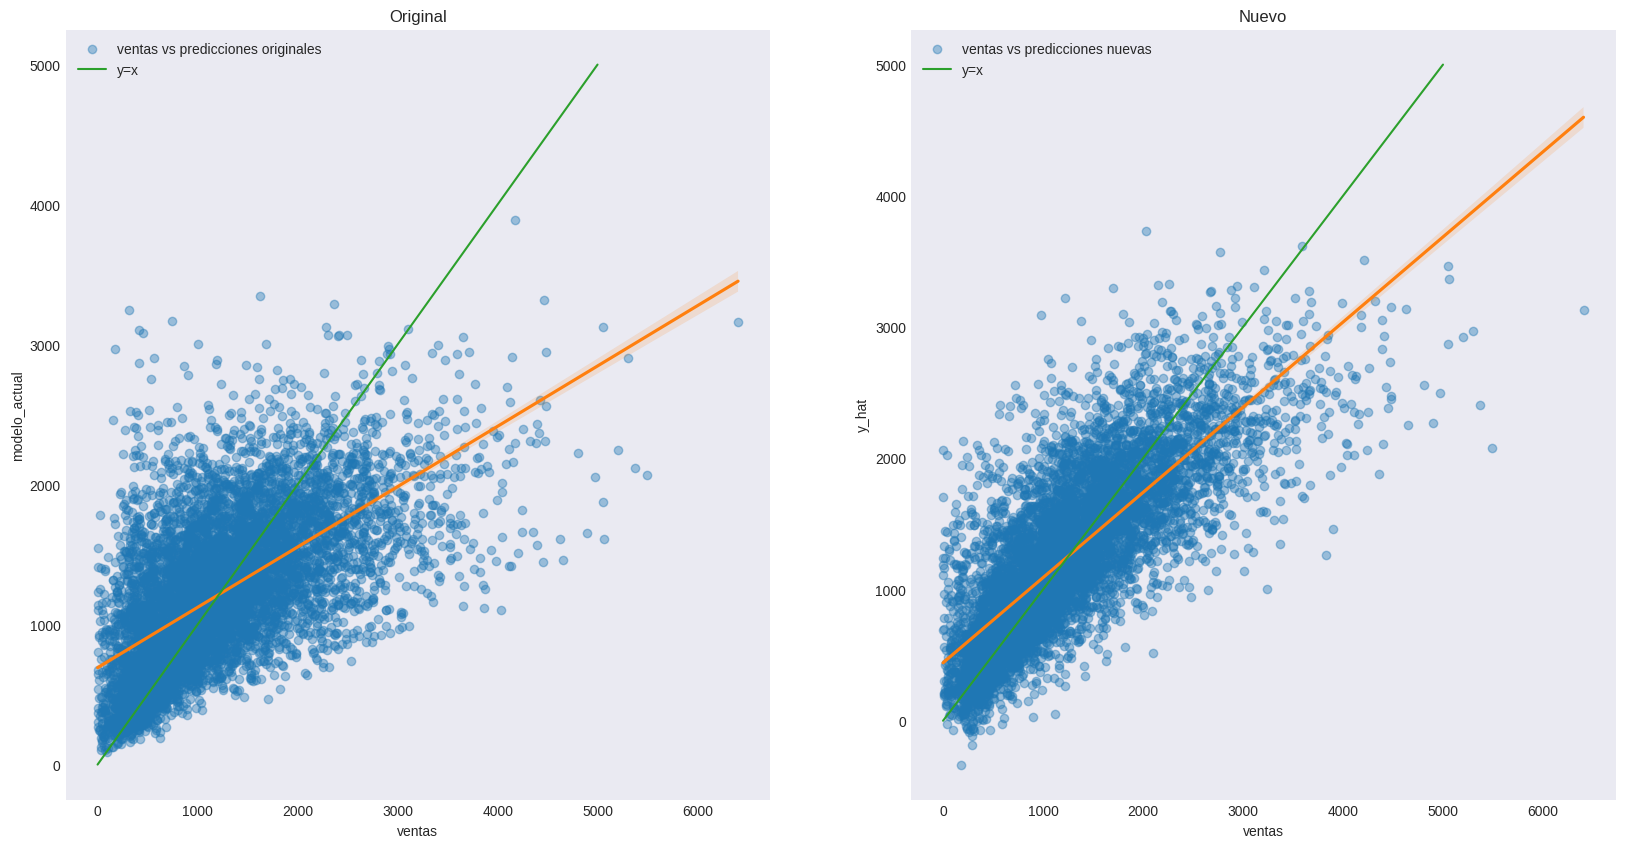

In [48]:
# Gráfico de dispersión de ambos modelos
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)

sns.regplot(data=df_final, x='ventas', y='modelo_actual', label='ventas vs predicciones originales', scatter_kws={'color':palette[0], 'alpha':0.4}, line_kws={'color':palette[1]})
sns.lineplot(x=range(0, 5000), y=range(0, 5000), c=palette[2], label='y=x')
plt.title('Original')

plt.subplot(1, 2, 2)
sns.regplot(data=df_final, x='ventas', y='y_hat', label='ventas vs predicciones nuevas', scatter_kws={'color':palette[0], 'alpha':0.4}, line_kws={'color':palette[1]})
sns.lineplot(x=range(0, 5000), y=range(0, 5000), c=palette[2], label='y=x')
plt.title('Nuevo')

**Comentarios:**  
Similar a lo que se hizo anteriormente, se generan gráficos de dispersión para ambos modelos. A la izquierda, está el modelo actual y a la derecha está el modelo nuevo. Se observa que la nube de puntos de la derecha es menos dispersa. Además, cuando se traza una regresión lineal, en el caso del modelo nuevo esta se parece más a la curva $y=x$, de modo que el ajuste es mejor.

In [49]:
# Para efectos de gráficos, se calcula el mínimo error y el máximo error.

min_error = min(df_final.error_original.min(),df_final.error_nuevo.min() )
max_error = max(df_final.error_original.max(),df_final.error_nuevo.max() )

min_error, max_error

(-3451.7143763763443, 2932.979267383057)

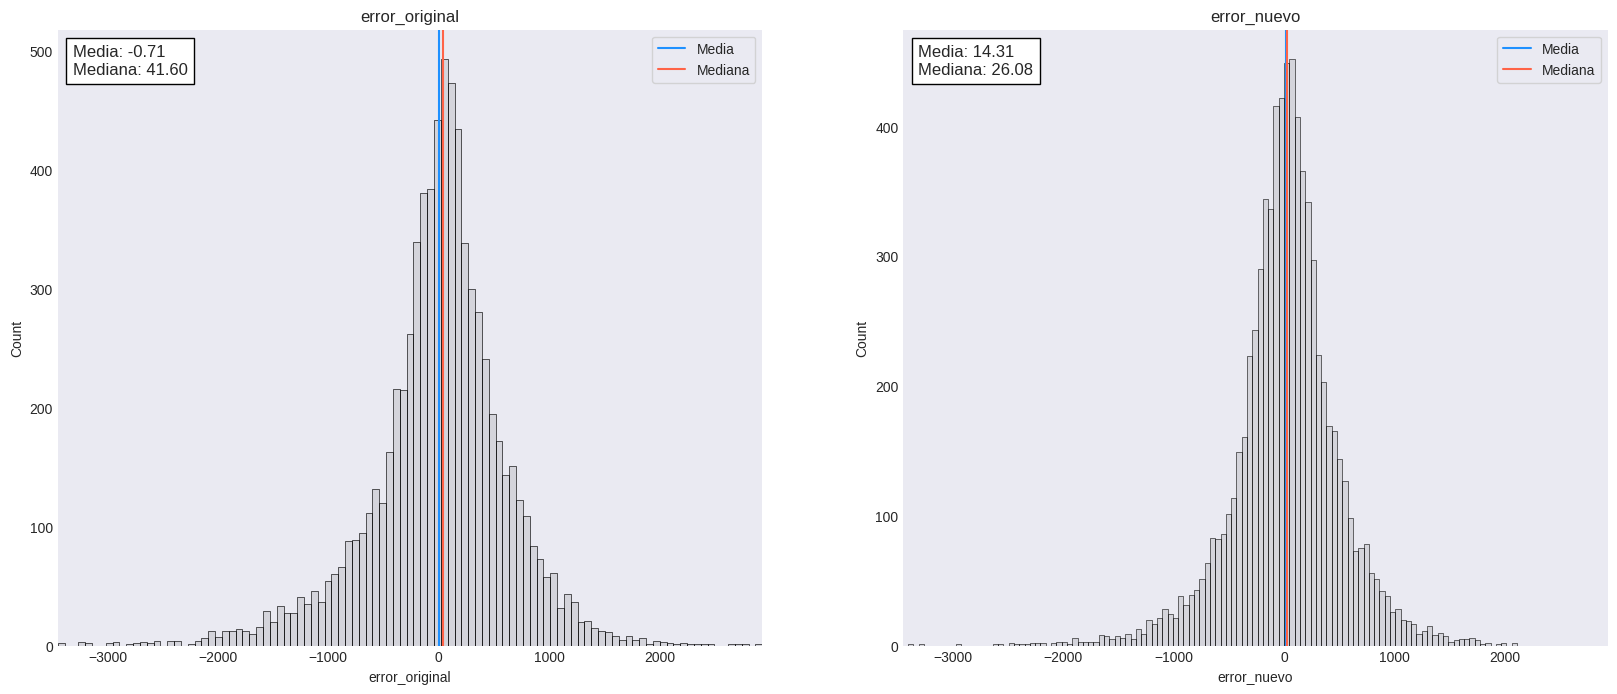

In [50]:
# Histogramas de los errores con signo.
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plot_hist(df_final, 'error_original', min_error, max_error)

plt.subplot(1, 2, 2)
plot_hist(df_final, 'error_nuevo', min_error, max_error)


**Comentarios:**  

Nota: El error se calcula como $Prediccion - Real$. Así, valores positivos de error indican sobreestimación y valores negativos indican subestimación.

Se observa que el error original tiene una mediana mayor que el error nuevo. Mientras que en el modelo original la mitad de los casos tienen un error mayor a 41.6 unidades, en el modelo nuevo este valor baja a 26.08. Esto ya indica que el nuevo modelo sobreestima menos que el modelo original. Esto se puede ver incluso gráficamente, ya que el modelo original tiene casos de errores mayores a 2000, mientras que el modelo nuevo no posee dichos casos o están en menor medida. En cuanto a la media, el modelo original posee una media de 0. Esto quiere decir que la magnitud de las sobreestimaciones y la magnitud de las subestimaciones se netean y queda aprox en 0. Esto no es necesariamente algo bueno, ya que sobreestimar un producto y subestimar otro no es equivalente a ser preciso en ambos. Por otro lado, en el caso del modelo nuevo las sobreestimaciones son de una magnitud ligeramente mayor con respecto a sus subestimaciones.

In [51]:
# Algunos gráficos evolutivos
for i, prod_id in enumerate(lista_productos):
    break
    df_sku = df_final[df_final['prod_id'] == prod_id].copy().reset_index(drop=True)
    plot_evolutivo(df_sku, i, prod_id, 'final')


**Comentarios:**  
Se generan los gráficos evolutivos para el top de productos de modo de analizar el 2023. Al igual que en todo el documento, se muestra solo un top, sin embargo, todos están disponibes en la carpeta respectiva.

![evolutivo](plots/evolutivos_final/000_574.png)
![evolutivo](plots/evolutivos_final/001_501.png)
![evolutivo](plots/evolutivos_final/002_142.png)
![evolutivo](plots/evolutivos_final/003_348.png)
![evolutivo](plots/evolutivos_final/004_795.png)


Si bien el nuevo modelo no es perfecto, sí se observa una mejora en la precisión respecto al modelo original. Esto no solo ayudará a mejorar los problemas de sobrestock, sino que también casos de venta perdida y quiebre que probablemente pasan más desapercibidos.

Se destaca el caso del producto 348 (cuarto gráfico). Existe un peak muy importante en febrero que ningún modelo capta. Sin emabrgo, el modelo actual sobreestima los meses posteriores. En cambio, el modelo nuevo sigue la tendencia de mejor forma, bajando el pronóstico de marzo en adelante. Esto mismo se observa en el tercer gráfico.

Pese a lo anterior, y pese a que en lo global el modelo nuevo mejora la situación, sería interesante revisar la metodología del modelo actual. Podría llegar a ser conveniente construir una especie de modelo híbrido que tome lo mejor de ambos modelos, ponderando sus predicciones o identificando en qué casos uno funciona mejor que el otro.

In [52]:
# Se listan los productos con mayor sobreestimación en ambos modelos, de modo de analizar el desempeño del modelo en esos casos.
df_final['sobreestimacion_original'] = df_final['error_original'].clip(lower=0)
df_final['sobreestimacion_nuevo'] = df_final['error_nuevo'].clip(lower=0)

productos_sobreestimados_original = list(df_final[['prod_id', 'sobreestimacion_original']].groupby('prod_id').sum().reset_index().sort_values(by='sobreestimacion_original', ascending=False)['prod_id'])
productos_sobreestimados_nuevo = list(df_final[['prod_id', 'sobreestimacion_nuevo']].groupby('prod_id').sum().reset_index().sort_values(by='sobreestimacion_nuevo', ascending=False)['prod_id'])

In [53]:
# Mismos gráficos que antes, pero en otro orden.

for i, prod_id in enumerate(productos_sobreestimados_original):
    break
    df_sku = df_final[df_final['prod_id'] == prod_id].copy().reset_index(drop=True)
    plot_evolutivo(df_sku, i, prod_id, 'sobreestimados_original')


**Comentarios:**

Se muestra el top de 3 productos con mayor sobreestimación en el modelo actual. Se observa que el modelo nuevo mejora de manera considerable la situación. Además, se observa que se resuelve el problema que se diagnóstico en el inicio. El modelo actual no tiene bien aprendidas las estacionalidades, de modo que cada vez que se produce un peak, lo termina replicando en meses posteriores a la estacionalidad. En cambio, el modelo nuevo logra resolver esto, manteniendo los peaks en los meses de estacionalidad alta.

![evolutivo](plots/evolutivos_sobreestimados_original/000_928.png)
![evolutivo](plots/evolutivos_sobreestimados_original/001_697.png)
![evolutivo](plots/evolutivos_sobreestimados_original/002_602.png)

In [54]:
# Mismos gráficos que antes, pero en otro orden.
for i, prod_id in enumerate(productos_sobreestimados_nuevo):
    break
    df_sku = df_final[df_final['prod_id'] == prod_id].copy().reset_index(drop=True)
    plot_evolutivo(df_sku, i, prod_id, 'sobreestimados_nuevos')

    


**Comentarios:**

De modo de tener todo mapeado, también existen casos contrarios. Aquellos en que el modelo nuevo termina sobreestimando. Es en estos casos donde valdría la pena profundizar en el modelo actual, de modo de identificar sus bondades.

![evolutivo](plots/evolutivos_sobreestimados_nuevos/000_512.png)
![evolutivo](plots/evolutivos_sobreestimados_nuevos/001_445.png)
![evolutivo](plots/evolutivos_sobreestimados_nuevos/002_879.png)



In [55]:
print('Sobreestimación modelo original', round(df_final['sobreestimacion_original'].sum(), 2))
print('Sobreestimación modelo nuevo', round(df_final['sobreestimacion_nuevo'].sum(), 2))

Sobreestimación modelo original 1681187.77
Sobreestimación modelo nuevo 1364183.67


**Comentarios**:  
Finalmente, se observa que el nuevo modelo tiene una sobreestimación total menor de forma clara. Por supuesto, esto no es una conclusión absoluta y se deben revisar los casos específicos en que no se comporta de la mejor manera. Sin embargo, sumando todos los puntos ya comentados, se estima que el modelo propuesta mejorará la situación actual, no solo respecto al sobrestock, sino que también respecto a los casos de subestimación, quiebres y venta perdida.

### 6. Revisión consistencia del modelo
En esta sección se validará que el modelo resultante cumpla con que el precio sea inverso a la demanda.

In [56]:
lista = []
for prod_id, model_i in model_1.models_dict.items():
    features = model_i[0].get_feature_names_out()
    precio_index = np.where(features=='precio_promedio')[0][0]
    coeficiente = model_i[-1].coef_[precio_index]
    if coeficiente >= 0:
        print(coeficiente)
    lista.append((prod_id, coeficiente))

pd.DataFrame(lista, columns=['prod_id', 'Coeficiente']).sort_values(by='Coeficiente')    

,prod_id,Coeficiente
560,266,-1844.151955
567,352,-1770.682349
471,322,-1729.680451
457,203,-1709.445796
405,628,-1676.233837
...,...,...
351,56,-252.209087
618,900,-236.502422
561,302,-231.435084
413,726,-222.928295


**Comentarios:**  
Se observa que todos los precios tienen un impacto negativo sobre la demanda. Es decir, a mayor precio, menor sería la demanda. Esto tiene todo el sentido cuando hablamos de productos que no son de lujo. El hecho de poder realizar este análisis es otra de las ventajas que nos entrega la regresión lineal por sobre otros modelos. 

En caso de que alguno de los coeficientes fuese positivo habría que hacer doble click y analizar qué está ocurriendo. Si acaso existe una anomalía en los datos, una mal interpretación. Incluso, podría ser que para ese producto el precio se deba descartar como coeficiente.

### 7. Preparación predicciones 2024
En esta sección se preparan las predicciones para el año 2024. Al no existir mayor información acerca del precio futuro, se evalúan 3 caminos:
- Utilizar el precio de diciembre de 2023 como precio para el 2024 completo: es un camino razonable, pero se desaprovecharía información adicional.
- Utilizar el precio promedio ponderado de 2023 como precio para el 2024: camino muy similar al anterior, pero que aprovecha la data completa y tiene representados a todos los meses.
- Replicar el precio de cada mes del 2023 en el 2024: camino que asume que el precio es dependiente del mes, lo que no se vio al analizar los datos.

Así, se decide utilizar el precio promedio ponderado de 2023 como precio para cada producto. Este es un supuesto conservador, ya que no realiza supuestos acerca de la decisión de precio de cada mes. Esta estimación se podría mejorar si es que se usara una medida del aumento sostenido de precios en el largo plazo. Es decir, tomar el promedio ponderado de 2023 más cierto aumento inter anual. Sin embargo, en los datos no se ve un aumento sostenido de los precios a lo largo de los años, de modo que no es necesario. Por último, el mejor escenario sería que el cliente cargue los precios planificados y con eso se generen las predicciones. Sin embargo, para efectos de este prueba, no es un camino que se vaya a explorar.

#### 7.1. Preparando set de datos

In [57]:
df_train = df[['fecha', 'prod_id', 'precio_promedio', 'ventas']].copy()
df_train['tag'] = 'entrenamiento'
df_train.head()

,fecha,prod_id,precio_promedio,ventas,tag
0,2012-01-01,13,7877.697279,1528.0,entrenamiento
1,2012-01-01,29,4702.427988,2048.0,entrenamiento
2,2012-01-01,89,4550.364204,2214.0,entrenamiento
3,2012-01-01,101,2993.408360,1600.0,entrenamiento
4,2012-01-01,106,6487.002360,1541.0,entrenamiento


In [58]:
# Preparando set de inferencia
df_products = pd.DataFrame(df_train['prod_id'].unique(), columns=['prod_id'])
df_months = pd.DataFrame(pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS'), columns=['fecha'])  

df_products['key'] = 0
df_months['key'] = 0

df_test = df_products.merge(df_months, on='key', how='outer')[['fecha', 'prod_id']]
df_test['precio_promedio'] = np.nan
df_test['ventas'] = np.nan
df_test['tag'] = 'inferencia'

In [59]:
df_final = pd.concat([df_train, df_test]).sort_values(by=['fecha', 'prod_id']).reset_index(drop=True)

In [60]:
# Se agrega la variable mes
df_final['mes'] = df_final['fecha'].dt.strftime("%b")
df_final.head()

,fecha,prod_id,precio_promedio,ventas,tag,mes
0,2012-01-01,13,7877.697279,1528.0,entrenamiento,Jan
1,2012-01-01,29,4702.427988,2048.0,entrenamiento,Jan
2,2012-01-01,89,4550.364204,2214.0,entrenamiento,Jan
3,2012-01-01,101,2993.408360,1600.0,entrenamiento,Jan
4,2012-01-01,106,6487.002360,1541.0,entrenamiento,Jan


In [61]:
# SE agrega la variable tendencia
min_fecha = df_final['fecha'].min()
df_final['tendencia'] =  (df_final['fecha'].dt.year - min_fecha.year) * 12 + (df_final['fecha'].dt.month - min_fecha.month) + 1
df_final

,fecha,prod_id,precio_promedio,ventas,tag,mes,tendencia
0,2012-01-01,13,7877.697279,1528.0,entrenamiento,Jan,1
1,2012-01-01,29,4702.427988,2048.0,entrenamiento,Jan,1
2,2012-01-01,89,4550.364204,2214.0,entrenamiento,Jan,1
3,2012-01-01,101,2993.408360,1600.0,entrenamiento,Jan,1
4,2012-01-01,106,6487.002360,1541.0,entrenamiento,Jan,1
...,...,...,...,...,...,...,...
68647,2024-12-01,987,NaN,NaN,inferencia,Dec,156
68648,2024-12-01,993,NaN,NaN,inferencia,Dec,156
68649,2024-12-01,996,NaN,NaN,inferencia,Dec,156
68650,2024-12-01,997,NaN,NaN,inferencia,Dec,156


In [62]:
# Se agrega la variable de días en el mes
df_final['days_in_month'] = ((df_final['fecha'] + pd.DateOffset(months=1)) - df_final['fecha']).dt.days
df_final


,fecha,prod_id,precio_promedio,ventas,tag,mes,tendencia,days_in_month
0,2012-01-01,13,7877.697279,1528.0,entrenamiento,Jan,1,31
1,2012-01-01,29,4702.427988,2048.0,entrenamiento,Jan,1,31
2,2012-01-01,89,4550.364204,2214.0,entrenamiento,Jan,1,31
3,2012-01-01,101,2993.408360,1600.0,entrenamiento,Jan,1,31
4,2012-01-01,106,6487.002360,1541.0,entrenamiento,Jan,1,31
...,...,...,...,...,...,...,...,...
68647,2024-12-01,987,NaN,NaN,inferencia,Dec,156,31
68648,2024-12-01,993,NaN,NaN,inferencia,Dec,156,31
68649,2024-12-01,996,NaN,NaN,inferencia,Dec,156,31
68650,2024-12-01,997,NaN,NaN,inferencia,Dec,156,31


#### 7.2. Entrenando el modelo

In [63]:
X_train = df_final.loc[df_final['tag'] == 'entrenamiento', ['prod_id', 'precio_promedio', 'ventas', 'mes', 'tendencia', 'days_in_month']].copy()
y_train = X_train.pop('ventas')

In [64]:
model = joblib.load('models/LinearRegression_prod_id.joblib')
model.train(X_train, y_train)

In [65]:
# Corroboramos coeficientes
lista = []
for prod_id, model_i in model.models_dict.items():
    features = model_i[0].get_feature_names_out()
    precio_index = np.where(features=='precio_promedio')[0][0]
    coeficiente = model_i[-1].coef_[precio_index]
    if coeficiente >= 0:
        print(coeficiente)
    lista.append((prod_id, coeficiente))

pd.DataFrame(lista, columns=['prod_id', 'Coeficiente']).sort_values(by='Coeficiente')    

,prod_id,Coeficiente
571,362,-1904.152573
457,203,-1888.076087
471,322,-1743.426013
405,628,-1706.705813
567,352,-1700.430911
...,...,...
425,838,-243.524939
494,625,-183.116609
561,302,-181.644854
193,298,-142.912518


In [66]:
# Sanity check
y_hat_train = model.predict(X_train)
reportar_error(y_train, y_hat_train)

Error absoluto medio: 259.23
Error absoluto mediano: 181.54


**Comentarios:**  
Este es un cálculo del error del modelo sobre sus mismos datos de entrenamiento. Solo sirve para corroborar que no hayan existido problemas graves en el periodo del entrenamiento. Nunca se debiese evaluar el error de un modelo en datos que vio para entrenar.

#### 7.3. Preparando set de inferencia

In [67]:
df_2023 = df.loc[df['fecha'] >= '2023-01-01', ['prod_id', 'ingreso', 'ventas']].copy()
df_2023 = df_2023.groupby('prod_id').sum().reset_index()
df_2023['precio_promedio_2023'] = df_2023['ingreso']/df_2023['ventas']
df_2023 = df_2023[['prod_id', 'precio_promedio_2023']].copy()

In [68]:
X_test = df_final.loc[df_final['tag'] == 'inferencia', ['prod_id', 'ventas', 'mes', 'tendencia', 'days_in_month']].copy()
_ = X_test.pop('ventas')

In [69]:
X_test = X_test.merge(df_2023, on='prod_id', how='inner').copy()
X_test.index = df_final.loc[df_final['tag'] == 'inferencia'].index


In [70]:
X_test.columns = ['prod_id','mes','tendencia','days_in_month','precio_promedio']
X_test = X_test[['prod_id', 'precio_promedio','mes', 'tendencia', 'days_in_month']].copy()

#### 7.4. Predicciones

In [71]:
y_hat_test = model.predict(X_test)

#### 7.5. Consolidación y revisión de las proyecciones resultantes

In [72]:
# Se consolidan los datos
X_test['y_hat'] = y_hat_test
X_train['y_hat'] = y_hat_train
X_train['ventas'] = y_train

df_entrega = pd.concat([X_train, X_test])
df_entrega['fecha'] = df_final['fecha']

<Axes: xlabel='fecha', ylabel='ventas'>

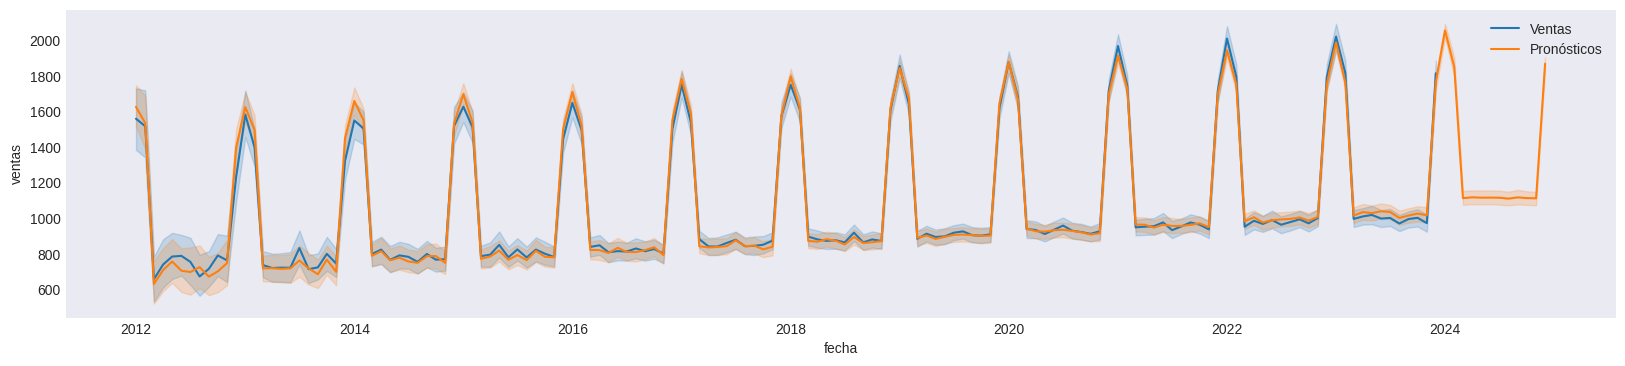

In [73]:
# Gráfico de las ventas y los pronósticos para todo el mix

plt.figure(figsize=(20, 4))
sns.lineplot(data=df_entrega, x='fecha', y='ventas', label='Ventas')
sns.lineplot(data=df_entrega, x='fecha', y='y_hat', label='Pronósticos')

In [74]:
# Se generan 635 gráficos de la venta vs modelo nuevo priorizando los productos de mayor ingreso. 
# Estos gráficos son guardados en la carpeta plots/evolutivos_prediccion_final
for i, prod_id in enumerate(lista_productos):
    break
    df_temp = df_entrega[df_entrega['prod_id']==prod_id].copy().reset_index()
    plt.figure(figsize=(16, 4))
    plt.title(f'Grafico producto: {prod_id}')
    sns.lineplot(data=df_temp, x='fecha', y='ventas', label='Venta')
    sns.lineplot(data=df_temp, x='fecha', y='y_hat', label='Modelo_Nuevo')
    plt.savefig(f'plots/evolutivos_prediccion_final/{i:03d}_{prod_id}.png')

A continuación, se muestran algunos de los gráficos con las proyecciones finales. Se observa que siguen una lógica bastante similar a las ventas históricas.

![evolutivo](plots/evolutivos_prediccion_final/000_574.png)
![evolutivo](plots/evolutivos_prediccion_final/001_501.png)
![evolutivo](plots/evolutivos_prediccion_final/002_142.png)
![evolutivo](plots/evolutivos_prediccion_final/003_348.png)
![evolutivo](plots/evolutivos_prediccion_final/004_795.png)
![evolutivo](plots/evolutivos_prediccion_final/005_830.png)




#### 7.6. Paso a CSV

Se guardan las predicciones finales en un archivo csv con columnas fecha, producto y predicción.

In [75]:
df_entrega.loc[df_entrega['fecha'] >= '2024-01-01', ['fecha', 'prod_id', 'y_hat']].to_csv('desafio_modelo_de_demanda_pred_2024.csv', index=False)

**Comentarios:**

Las predicciones se entregan en el archivo csv 'desafio_modelo_de_demanda_pred_2024.csv'. Como se comentó a lo largo del documento, este incluye solo productos que hayan tenido ventas hasta el 2023. Además, asume un precio fijo por producto para el 2024 equivalente al precio promedio ponderado del 2023.

## IV. Medición del Beneficio en $: 

Se presenta la metodología para medir el beneficio o costo de utilizar el nuevo modelo para un producto y un mes específico utilizando solo la información entregada. El análisis puede ser extrapolado al resto de los productos y meses sin ningún problema. Asumamos que se tiene un pronóstico original, un pronóstico nuevo y un dato de demanda:
- Demanda: $y$
- Pronostico Original: $\hat{y_0}$
- Pronostico Nuevo: $\hat{y_1}$

Para el caso general, se puede decir que existe un costo de sobreestimación, asociado a costo de almacenaje, costo de orden, costo de transporte, etc. Incluso, se podría discutir que el costo máximo de la sobreestimación es la pérdida de los bienes por caducidad. En el caso general:
$$CostoSobreestimacion = F(  \max(\hat{y} - y, 0)) $$
Donde $F()$ es una función que calcula el costo en función de la cantidad de unidades sobreestimadas. Más adelante se discutirá $F()$.

Por otra parte, existe un costo de subestimación, asociado a las ventas no satisfechas y a las pérdidas de confianza en el cliente.
$$CostoSubestimacion = G( \max(y- \hat{y}, 0))$$
Donde $G()$ es una función que calcula el costo en función de la cantidad de unidades subestimadas.

Así, el beneficio (o costo) de cambiar un pronóstico original por uno nuevo se puede modelar como:
$$BeneficioNuevoPronostico = [F(  \max(\hat{y_0} - y, 0)) + G( \max(y- \hat{y_0}, 0))] - [F(  \max(\hat{y_1} - y, 0)) + G( \max(y- \hat{y_1}, 0))]$$
Donde el primer término corresponde al costo (en positivo) debido al error del modelo actual, mientras que el segundo término corresponde al costo debido al error del modelo nuevo. Así, si el segundo término es menor, se obtiene un beneficio.

Respecto a las funciones $F()$ y $G()$ estas pueden ser todo lo simples o complejas que uno quiera. Por ejemplo:
- $F(x)$: esta función debería estar compuesta por una suma de factores, entre los que se encuentran el costo de almacenaje por más tiempo y un costo progresivo porque los productos se degradan hasta caducar. El segundo término es más abstracto y puede llegar a ser complejo de estimar, en cambio el primero puede resultar más sencillo. Esta función podría quedar como $F(x) = \alpha n p x$. Donde $x$ es la cantidad de unidades subestimadas, $p$ es el precio unitario del producto y $\alpha$ es la proporción del precio que corresponde a costo de inventario. Por último, $n$ representa la cantidad de meses esperados adicionales que el producto deberá ser mantenido. El factor $\alpha$ dependerá del tipo de producto y de la industria. Además, en algunos casos el costo por caducidad puede tener mucho peso, de modo que podría convenir explorarlo más. 
- $G(x)$: dado que es muy complejo modelar la pérdida de confianza del cliente, podemos mantener este costo solamente en lo relativo a las ventas que se pierden. Asumiendo un precio potencial de venta $p$, el ingreso que se deja de percibir por ventas perdidas es de $px$, donde $x$ es la cantidad de unidades que se subestimó. Si, por ejemplo, parte de las unidades que no puedo satisfacer hoy puedo satisfacerlas a futuro, se podría utilizar una tasa de venta perdida $\beta$, donde cada unidad de venta no satisfecha tiene una probabilidad $\beta$ de terminar perdiéndose definitivamente. Así, $G(x) = \beta p x$. El caso más ácido sería asumir $\beta=1$.

Así, el beneficio final puede ser reescrito como:

$$BeneficioNuevoPronostico = [\alpha n p \max(\hat{y_0} - y, 0) + \beta p \max(y- \hat{y_0}, 0)] - [\alpha n p x \max(\hat{y_1} - y, 0) + \beta p \max(y- \hat{y_1}, 0)]$$

Reordenando:

$$BeneficioNuevoPronostico = \alpha n p [\max(\hat{y_0} - y, 0) - \max(\hat{y_1} - y, 0)] + \beta p[ \max(y- \hat{y_0}, 0) - \max(y- \hat{y_1}, 0)]$$

Cabe destacar que un producto - mes solo tendrá costo de sobreestimación o de subestimación para un determinado pronóstico. Lo anterior es un enfoque general para medir beneficios con la información presentada. Idealmente, si se contara con más información del negocio,  las formas funcionales de $F()$ y $G()$ podrían ser revisadas y adaptadas a valores más correctos. Por ejemplo, se podría determinar que porcentaje de las ventas no satisfechas terminan llevando a ventas perdidas y con eso se obtendría $\beta$. Asimismo, entender que ocurre con el sobrestock o cómo son los costos de inventario en la industria permitiría definir mejor los factores que componen $F()$. Sin embargo, con las herramientas dadas, lo anterior es un enfoque sencillo y aplicable para encontrar el beneficio potencial de utilizar el nuevo pronóstico.

En caso de que se tuviera más información, por ejemplo, el del costo de los productos, podría ser posible calcular el costo de inventario pre y post implementación del nuevo modelo. Luego, asumiendo que existe un ahorro de $C$ en costo de inventario, el beneficio mensual sería invertir ese capital $C$ en otros proyectos del cliente, generando un retorno periódico.

## V. Metodología para la Puesta en Producción: 

En esta sección se presenta la metodología para que el modelo tenga éxito y genere beneficios al cliente.

Cabe destacar que varios de estos temas ya se mencionaron en el punto III, en cuanto a cómo este modelo se vería en productivo. Sin embargo, aquí se retoman y profundizan. En la práctica, se deberá contar con un almacenamiento para los datos históricos de venta del cliente, así como para los datos históricos de pronóstico. Además, este almacenamiento también deberá contener los modelos pasados que se han generado. Los datos pueden ser guardados en algún servidor de base de datos o en algún servicio como S3. En cambio, los modelos sí o sí deberían ser guardados en un servicio como S3. Esta base de datos histórica debe ser periódicamente actualizada con los nuevos datos de venta que lleguen, así como con los precios, las nuevas predicciones, etc. Esto podría realizarse con algún orquestador de procesos como Apache Airflow. También de forma periódica, se deben poder gatillar trabajos de entrenamiento que consuman esta base de datos y que guarden los modelos en S3. Posteriormente, se deben poder generar también trabajos de inferencia que consuman la base de datos y los modelos en S3, para luego escribir las predicciones en la misma base de datos, lugar donde se pueden entregar al cliente final. Por último, debe existir otra parte de este sistema en se pueda monitorear el desemeño del modelo. Esto será un panel BI que se alimente de la base de datos y se actualice periódicamente. Además, se pueden configurar alertas para que este panel informe en caso de que el modelo no tenga un buen desempeño. Sobra decir que todo este sistema debe estar esquematizado y debe ser de público conocimiento, así como también todos los procesos deben ser documentados.

Lo anterior es un resumen muy general de cómo se podría ver este modelo en la práctica. A continuación, se presentan algunos puntos clave que se deben atender para que el valor al cliente final esté garantizado tanto en el corto como en el largo plazo.

a) **Entrenamiento y Validación Rigurosos:**  
Primero que todo, se debe asegurar que el proceso de entrenamiento que se ha realizado sobre el modelo, así como las conclusiones obtenidas en la validación, se han hecho de forma rigurosa. En concreto, se debe validar que el modelo sea robusto, lo que se puede comprobar a través de múltiples validaciones cruzadas. Además, siempre es bueno validar que no exista data leakage en la modelación.

b) **Generar un ambiente de pruebas:**  
Es recomendable que antes de que el modelo se utilice en productivo sea cargado en un ambiente de pruebas. Este debe replicar el ambiente productivo y su objetivo es detectar potenciales errores o problemas con el modelo en un entorno sin riesgo. En este entorno el modelo podría generar predicciones durante un tiempo indeterminado, de modo de comprobar su correcto funcionamiento, además de validar que la precisión es la esperada.

c) **Monitoreo continuo:**
Algo muy relevante es monitorear el desempeño del modelo. Inicialmente, puede hacerse en este ambiente de pruebas, sin embargo, es algo que hay que tener en productivo. Se deben definir distintas métricas de error importantes para el negocio, tales como el error absoluto medio u otros y revisar su desempeño en el tiempo. Asimismo, se puede revisar el costo computacional del modelo y se puede verificar el desempeño del mismo a lo largo del tiempo. Este monitoreo puede realizarse en una herramienta BI alimentada de una base de datos que guarde los distintos pronósticos y modelos que se van construyendo. Dicho lo anterior, es relevante también guardar el histórico de pronósticos que genera el modelo, de modo de obtener el mayor valor posible de las predicciones. Por supuesto, este sistema debe generar alertas en caso de que el modelo esté consumiendo muchos recursos o esté generando malos resultados.

d) **Re-entrenamiento:**
Ligado a lo anterior, aparecen los re entrenamientos. Este es el proceso en el que el modelo vuelve a tomar datos para actualizar sus coeficientes. Esto puede ocurrir en un intervalo periódico, pero también puede gatillarse debido a un mal desempeño de modelos anteriores. Para el modelo planteado en esta prueba, este re-entrenamiento solo consta de volver a calcular las regresiones lineales. Sin embargo, en modelos más complejos, como árboles o gradient boosting, sería necesario además re-hacer el proceso de Hyperparameter Tuning, el cual es bastante costoso. Así, habrían dos procesos de re-entrenamiento: el re-entrenamiento como tal y el re-estudio, diferenciándose en que el segundo se encarga del Hyperparameter-tuning, mientras que el primero solo entrena el modelo con los parámetros ótpimos. Por supuesto, el re-estudio es un proceso que se debería hacer con menor frecuencia, sin embargo, es necesario realizarlo periódicamente.

e) **Gestion de versiones:**
Otro punto muy relevante es que el modelo como tal será un archivo con alguna extensión. Luego, será necesario que en cada entrenamiento el modelo anterior sea guardado a modo de respaldo. Esto en caso de que versiones posteriores no funcionen bien y se deba volver a una versión anterior.

f) **Documentación y capacitación:**
Un punto muy relevante es que el modelo debe estar documentado correctamente y los distintos participantes deben estar capacitados para usarlo y/o mantenerlo en caso de que corresponda. Un riesgo muy alto para el éxito del modelo es que el conocimiento se pierda y termine quedando en desuso o se le de un mal uso producto del desconocimiento. Por ello, es muy relevante que el modelo no quede atado a una persona específica o a un rol, sino que debe ser conocido por los distintos equipos interesados y todos deben estar claros del valor que genera, de modo que sea un activo clave del cliente.
 
g) **Marchas blancas:**  
Todo gran cambio o publicación del modelo debe contar con un periodo reservado de marcha blanca, en que la prioridad máxima del equipo sea detectar y atender posibles fallas del mismo. Este enfoque garantiza que los desarrollos aumenten su probabilidad de éxito y satisfacción del cliente. 